<a href="https://colab.research.google.com/github/SinSham/Medlr-assignment/blob/main/Medlr_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
from sklearn.impute import KNNImputer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/medlr_assignment_dataset.csv')

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [4]:
df.head()

,id,name,source,prescription_required,retail_price,discounted_price,manufacturer,quantity,packaging_form,salts
0,source_6-75716,Dolo 1gm Tablet,source_6,False,45.58,40.11,micro labs,10 Tablet(s) in Strip,STRIP,Paracetamol / Acetaminophen(1.0 G)
1,source_2-39579,Dolo 1000mg Infusion,source_2,True,268.00,219.76,micro labs ltd,NaN,NaN,Paracetamol/Acetaminophen 1000mg
2,source_7-90343,Dolo 1000mg Tablet,source_7,False,45.58,35.10,micro labs ltd,10.0 tablets in 1 strip,NaN,Paracetamol (1000mg)
3,source_1-65076,Dolo 1000 mg Tablet 10's,source_1,True,45.50,40.00,micro labs ltd,10,Strip | Tablet,PARACETAMOL-1000MG
4,source_1-65077,Dolo 120 mg Suspension 60 ml,source_1,False,40.00,35.20,micro labs ltd,60,Bottle | Suspension,PARACETAMOL-120MG


In [5]:
df.shape

(1448, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1448 entries, 0 to 1447
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1448 non-null   object 
 1   name                   1448 non-null   object 
 2   source                 1448 non-null   object 
 3   prescription_required  1448 non-null   bool   
 4   retail_price           1367 non-null   float64
 5   discounted_price       1384 non-null   float64
 6   manufacturer           1446 non-null   object 
 7   quantity               1184 non-null   object 
 8   packaging_form         931 non-null    object 
 9   salts                  1389 non-null   object 
dtypes: bool(1), float64(2), object(7)
memory usage: 103.4+ KB


## Creating two new columns called "dosage form" to store the medicine type and "base name" for medicine's base name

In [7]:
dosage_forms = [
    "tablet", "capsule", "powder", "solution", "emulsion", "suspension", "syrup", "infusion", "ointment", "cream", "gel", "lotion", "spray", "injection",
    "eye drop", "ear drop", "nasal drop", "paint", "liquid", "soap", "shampoo", "sachet"]

In [8]:
def clean_and_extract(row):
    text = row.lower()
    text = ' '.join(text.split())
    text = text.replace('-', ' ')
    text = re.sub(r"s\b", '', text)

    # Extract Base Name
    base_name = text.split()[0]

    # Extract Dosage Form
    dosage_form = ''
    for form in dosage_forms:
        if form in text:
            dosage_form = form
            break

    return pd.Series([base_name, dosage_form])


df[['base name', 'dosage form']] = df['name'].apply(clean_and_extract)

In [9]:
df['base name'].unique()

array(['dolo', 'doloact', 'doloage', 'doloar', 'dolobak', 'doloban',
       'dolobest', 'dolobid', 'dolobrake', 'doloby', 'dolocaf',
       'dolocaine', 'dolocalm', 'dolocam', 'dolocare', 'dolocef',
       'dolocel', 'dolocem', 'dolocerin', 'dolocet', 'dolochek',
       'dolocide', 'dolocip', 'doloco', 'dolocold', 'dolocrat',
       'dolocure', 'dolocute', 'dolodart', 'dolodase', 'dolodik',
       'dolodil', 'dolodol', 'dolodor', 'doloend', 'dolofab', 'dolofan',
       'dolofen', 'dolofenac', 'dolofin', 'dolofirst', 'doloflam',
       'doloflex', 'doloforce', 'dolofort', 'doloforte', 'dolofresh',
       'dologaba', 'dologel', 'dologen', 'dologesic', 'dologin',
       'dologlan', 'dolohit', 'doloid', 'doloja', 'dolojoy', 'dolojust',
       'dolokam', 'doloket', 'dolokim', 'dolokind', 'dolokoff', 'dololax',
       'dololsac', 'dololup', 'dolomade', 'dolomark', 'doloma', 'dolomax',
       'dolomec', 'dolomed', 'dolomeg', 'dolomet', 'dolomide', 'dolomine',
       'dolomol', 'dolomon', 'dol

In [10]:
df['base name'].nunique()

243

In [11]:
df.loc[df['base name'].isin(['ibuprofen(alk)', 'ibuprofen(cip)']), 'base name'] = 'ibuprofen'

In [12]:
df['base name'].nunique()

242

In [13]:
df.head()

,id,name,source,prescription_required,retail_price,discounted_price,manufacturer,quantity,packaging_form,salts,base name,dosage form
0,source_6-75716,Dolo 1gm Tablet,source_6,False,45.58,40.11,micro labs,10 Tablet(s) in Strip,STRIP,Paracetamol / Acetaminophen(1.0 G),dolo,tablet
1,source_2-39579,Dolo 1000mg Infusion,source_2,True,268.00,219.76,micro labs ltd,NaN,NaN,Paracetamol/Acetaminophen 1000mg,dolo,infusion
2,source_7-90343,Dolo 1000mg Tablet,source_7,False,45.58,35.10,micro labs ltd,10.0 tablets in 1 strip,NaN,Paracetamol (1000mg),dolo,tablet
3,source_1-65076,Dolo 1000 mg Tablet 10's,source_1,True,45.50,40.00,micro labs ltd,10,Strip | Tablet,PARACETAMOL-1000MG,dolo,tablet
4,source_1-65077,Dolo 120 mg Suspension 60 ml,source_1,False,40.00,35.20,micro labs ltd,60,Bottle | Suspension,PARACETAMOL-120MG,dolo,suspension


## Cleaning column "name"

In [14]:
df['name'] = df['name'].str.lower()
df['name'] = df['name'].apply(lambda x: re.sub(r'[^a-z0-9\'/\s]', '', x))  # Remove special characters except apostrophe and '/'
df['name'] = df['name'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [15]:
def add_space_number_unit(text):
    return re.sub(r'(\d+)([a-zA-Z]+)', r'\1 \2', text)

df['name'] = df['name'].apply(lambda x: add_space_number_unit(x))

In [16]:
df["name"]

,name
0,dolo 1 gm tablet
1,dolo 1000 mg infusion
2,dolo 1000 mg tablet
3,dolo 1000 mg tablet 10's
4,dolo 120 mg suspension 60 ml
5,dolo 120 mg suspension 60 ml
6,dolo 120 suspension
7,dolo 156 mg syp 60 ml
8,dolo 15625 mg suspension
9,dolo 15625 mg syrup 60 ml


## Filling dosage form column using information from name column

In [17]:
df[df['dosage form'] == ""]

,id,name,source,prescription_required,retail_price,discounted_price,manufacturer,quantity,packaging_form,salts,base name,dosage form
7,source_3-2151,dolo 156 mg syp 60 ml,source_3,False,51.00,43.350,micro labs ltd,60,Bottle SYRUP,PARACETAMOL/ACETAMINOPHEN 156.25 MG /5ML,dolo,
11,source_3-2152,dolo 250 mg syp 60 ml,source_3,False,45.02,38.270,micro labs ltd,60,Bottle SYRUP,PARACETAMOL/ACETAMINOPHEN 250 MG /5ML,dolo,
17,source_3-2153,dolo 500 mg tab 1 x15,source_3,False,14.95,14.200,micro labs ltd,15,Strip TABLET,PARACETAMOL/ACETAMINOPHEN 500 MG,dolo,
26,source_6-75724,dolo bottle of 5 ml drops,source_6,False,27.00,27.000,micro labs,5ml Oral Drop in Bottle,BOTTLE,Paracetamol / Acetaminophen(100.0 Mg),dolo,
35,source_7-90348,dolo drops,source_7,False,30.07,22.500,micro labs ltd,15.0 ml in 1 packet,NaN,Paracetamol (100mg/ml),dolo,
47,source_1-65088,dolomf susp 60 ml,source_1,True,63.00,55.400,micro labs ltd,60,Bottle | Suspension,MEFENAMIC ACID-100MG + PARACETAMOL-250MG,dolo,
49,source_1-65089,dolo oral drops 15 ml,source_1,False,30.00,26.400,micro labs ltd,15,Bottle | Oral Drops,PARACETAMOL-100MG,dolo,
83,source_1-65097,doloar sp tab 10's,source_1,True,110.00,96.800,unibiotech health care pvt ltd,10,Strip | Tablet,ACECLOFENAC-100MG + PARACETAMOL-325MG + SERRATIOPEPTIDASE-15MG,doloar,
97,source_6-75758,doloban plus vet bolus,source_6,True,28.00,24.640,mankind pharmaceuticals ltd,NaN,STRIP,Chlorzoxazone + Nimesulide + Paracetamol,doloban,
118,source_6-75769,dolobid m oint 30 gm,source_6,True,87.19,76.730,apotex pharmachem india pvt ltd,30g Ointment in Tube,TUBE,Diclofenac + Menthol + Methyl Salicylate,dolobid,


In [18]:
# Update dosage form based on 'tab' or 'syp' in the 'name' column
def fill_dosage_form_simple(row):
    if 'syp' in row['name'].lower():
        return 'syrup'
    elif 'tab' in row['name'].lower():
        return 'tablet'
    elif 'susp' in row['name'].lower():
        return 'suspension'
    elif 'oint' in row['name'].lower():
        return 'ointment'
    elif 'inj' in row['name'].lower():
        return 'injection'
    # If no match, keep the existing value (or return NaN if preferred)
    return row['dosage form']

# Apply the function to the DataFrame
df['dosage form'] = df.apply(fill_dosage_form_simple, axis=1)

In [19]:
df[df['dosage form'] == ""]

,id,name,source,prescription_required,retail_price,discounted_price,manufacturer,quantity,packaging_form,salts,base name,dosage form
26,source_6-75724,dolo bottle of 5 ml drops,source_6,False,27.00,27.000,micro labs,5ml Oral Drop in Bottle,BOTTLE,Paracetamol / Acetaminophen(100.0 Mg),dolo,
35,source_7-90348,dolo drops,source_7,False,30.07,22.500,micro labs ltd,15.0 ml in 1 packet,NaN,Paracetamol (100mg/ml),dolo,
49,source_1-65089,dolo oral drops 15 ml,source_1,False,30.00,26.400,micro labs ltd,15,Bottle | Oral Drops,PARACETAMOL-100MG,dolo,
97,source_6-75758,doloban plus vet bolus,source_6,True,28.00,24.640,mankind pharmaceuticals ltd,NaN,STRIP,Chlorzoxazone + Nimesulide + Paracetamol,doloban,
436,source_2-39684,dolomol iv 100 ml,source_2,True,279.00,228.780,micro labs ltd,NaN,NaN,NaN,dolomol,
440,source_1-65191,dolomor cold susension 60 ml,source_1,True,75.00,66.000,unipark biotech pvt ltd,60,Bottle | Suspension,CHLORPHENIRAMINE-1MG + PARACETAMOL-125MG + PHENYLEPHRINE-2.5MG,dolomor,
566,source_2-39716,dolopar drops,source_2,True,33.50,27.470,micro labs ltd,NaN,NaN,Paracetamol/Acetaminophen 100mg/ml,dolopar,
567,source_1-65232,dolopar drops 15 ml,source_1,False,30.00,26.400,micro labs ltd,15,Bottle | Oral Drops,PARACETAMOL-100MG,dolopar,
760,source_2-39773,dolospas 20 mg/500 mg drop,source_2,True,11.25,9.220,intas pharmaceuticals ltd,NaN,NaN,"Dicyclomine 20mg,Paracetamol/Acetaminophen 500mg",dolospa,
762,source_6-76010,dolospas drops,source_6,True,13.57,11.530,intas pharmaceuticals ltd gx,10ml Oral Drop in Bottle,BOTTLE,Dicycloverine + Paracetamol,dolospa,


In [20]:
df.iloc[[26, 35, 49, 440, 566, 567], df.columns.get_loc('dosage form')] = 'suspension'
df.iloc[97, df.columns.get_loc('dosage form')] = 'bolus'
df.iloc[1174, df.columns.get_loc('dosage form')] = 'eye and ear drop'
df.iloc[[846, 1308], df.columns.get_loc('dosage form')] = 'eye drop'
df.iloc[[760, 762, 763, 913], df.columns.get_loc('dosage form')] = 'oral drop'
df.iloc[[963, 964], df.columns.get_loc('dosage form')] = 'solution'
df.iloc[[436, 1206, 1411], df.columns.get_loc('dosage form')] = 'infusion'
df.iloc[[1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1262, 1263], df.columns.get_loc('dosage form')] = 'device'
df.iloc[[1352, 1353], df.columns.get_loc('dosage form')] = 'tablet'
df.iloc[1371, df.columns.get_loc('dosage form')] = 'emulsion'

In [21]:
df[df['dosage form'] == ""] #checking if still empty rows in dosage form

,id,name,source,prescription_required,retail_price,discounted_price,manufacturer,quantity,packaging_form,salts,base name,dosage form


In [22]:
df['dosage form'].nunique()

26

## Cleaning "manufacturer" column

In [23]:
print(df['manufacturer'].unique())

['micro labs' 'micro labs ltd' 'integra life sciences pvt ltd'
 'bosch pharmaceuticals pvt ltd' 'mankind pharmaceuticals ltd'
 'medico health care' 'gujarat liqui pharmacaps pvt ltd'
 'bioguard organics ltd' 'ochoa laboratories ltd'
 'ochoa laboratiories ltd' 'bmw pharmaco india pvt ltd' 'allenge india'
 'allenge india pharmaceuticals pvt ltd' 'unibiotech health care pvt ltd'
 'mankind pharma ltd' 'mankind pharma pvt ltd' 'ttk healthcare ltd'
 'ttk healthcare' 'apotex life sciences' 'apotex pharmachem india pvt ltd'
 'boyeger biotech pvt ltd' 'hnf care pvt ltd' 'cadila pharmaceuticals ltd'
 'zydus healthcare ltd' 'zydus cadila healthcare ltd'
 'cadila healthcare ltd' 'sanes pharmaceuticals' 'sresan pharmaceuticals'
 'cipla ltd' 'bhavishya pharmaceuticals pvt ltd' 'alkem laboratories ltd'
 'eurocare' 'vensat bio' 'dolphin laboratories'
 'dolphin healthcare pvt ltd' 'cian health care pvt ltd'
 'netprime pharma pvt ltd' 'zydus cadila' 'caplet india pvt ltd'
 'indoco remedies ltd' 'kee pha

In [24]:
# Check for missing or empty values in the 'manufacturer' column
missing_values = df[df['manufacturer'].isna() | (df['manufacturer'].str.strip() == '')]
missing_values

,id,name,source,prescription_required,retail_price,discounted_price,manufacturer,quantity,packaging_form,salts,base name,dosage form
206,source_6-75804,dolodol p tablet 10,source_6,True,313.47,275.85,NaN,15 Tablet(s) in Strip,STRIP,Paracetamol + Tramadol,dolodol,tablet
831,source_6-76036,dolour x tablets,source_6,True,53.00,46.64,NaN,10 Tablet(s) in Strip,STRIP,Aceclofenac + Paracetamol,dolour,tablet


In [25]:
df['manufacturer'].fillna("unknown", inplace=True)

In [26]:
def clean_manufacturer(name):
    name = name.lower()
    name = re.sub(r'\b(pvt|ltd|gx|llp)\b', '', name) #removing suffixes like "ltd", "pvt", "gx", "llp"
    name = re.sub(r'[^a-z0-9\s]', '', name)
    name = ' '.join(name.split())

    return name.strip()


df['manufacturer'] = df['manufacturer'].apply(clean_manufacturer)

In [27]:
df['manufacturer'] = df['manufacturer'].replace({
    r'\b(company|pharma|labs|laboratories|pharmaceuticals|industries|drugs|drug|pharmaceutical|pharmacy|laboratorie|pharma|life science|lifescience|lifesciences|life sciences|health care|healthcare|health product|health products|india|life care|therapeutics|therapeutic|pharmachem|pharmaco|pharmacaps|biotech|innovations|innovation)\b': ''
}, regex=True)

df['manufacturer'] = df['manufacturer'].apply(lambda x: ' '.join(x.split()).strip())

## Fixing spelling errors in names of manufacturer

In [28]:
df['manufacturer'] = df['manufacturer'].replace({"v m s": "vms"}, regex=True)
df['manufacturer'] = df['manufacturer'].replace({"f d c": "fdc"}, regex=True)
df['manufacturer'] = df['manufacturer'].replace({"m d": "md"}, regex=True)
df['manufacturer'] = df['manufacturer'].replace({"made inn": "madeinn"}, regex=True)
df['manufacturer'] = df['manufacturer'].replace({"galenis": "galenus"}, regex=True)
df['manufacturer'] = df['manufacturer'].replace({"mundi pharma": "mundipharma"}, regex=True)
df['manufacturer'] = df['manufacturer'].replace({"saviour": "savior"}, regex=True)

## Fixing inconsistent names

In [29]:
df["manufacturer"] = df["manufacturer"].astype(str).apply(lambda x: "zydus" if "zydus" in x else x)

In [30]:
df["manufacturer"] = df["manufacturer"].astype(str).apply(lambda x: "cadila" if "cadila" in x else x)

In [31]:
df['manufacturer'] = df['manufacturer'].astype(str).apply(lambda x: 'cipla' if 'cipla' in x else x)

In [32]:
df['manufacturer'] = df['manufacturer'].astype(str).apply(lambda x: 'ochoa' if 'ochoa' in x else x)

In [33]:
df['manufacturer'] = df['manufacturer'].astype(str).apply(lambda x: 'aerochem neutron' if 'aero chem neutron' in x else x)

In [34]:
df['manufacturer'] = df['manufacturer'].astype(str).apply(lambda x: 'tulip' if 'tulip' in x else x)

In [35]:
df['manufacturer'] = df['manufacturer'].astype(str).apply(lambda x: 'dolvis' if 'dolvis' in x else x)

In [36]:
df['manufacturer'] = df['manufacturer'].astype(str).apply(lambda x: 'dr reddy' if 'dr reddy' in x else x)

In [37]:
df['manufacturer'] = df['manufacturer'].astype(str).apply(lambda x: 'dr jrk' if 'dr jrk' in x else x)

In [38]:
df['manufacturer'] = df['manufacturer'].astype(str).apply(lambda x: 'winmark' if 'winmark' in x else x)

In [39]:
df['manufacturer'] = df['manufacturer'].astype(str).apply(lambda x: 'pfizer' if ('pfizer' in x or 'phizer' in x) else x)

In [40]:
df['manufacturer'] = df['manufacturer'].astype(str).apply(lambda x: 'mars chemicals' if 'mars' in x else x)

In [41]:
df['manufacturer'] = df['manufacturer'].astype(str).apply(lambda x: 'troikaa' if 'triokaa' in x else x)

In [42]:
df['manufacturer'] = df['manufacturer'].astype(str).apply(lambda x: 'hegde and hegde' if 'hegde' in x else x)

In [43]:
sorted_manufacturers = pd.DataFrame(sorted(df['manufacturer'].unique()), columns=['Manufacturer'])

print(sorted_manufacturers)

                          Manufacturer
0                                   3m
1                              aarotax
2                               abbott
3                                acron
4                                 acto
5                        adcock ingram
6                               adinos
7                     aerochem neutron
8                             aerozest
9                       agron remedies
10                               ajapa
11                        albert david
12                            alienist
13                             alisier
14                               alkem
15                             allenge
16                                alpa
17                      alpic remedies
18                               amwin
19                              anevay
20                                anvi
21                              apotex
22                               aptus
23                               ardor
24                       

## Removing inconsistencies from "Quantity" column

In [44]:
df.loc[df['dosage form'] == 'tablet', 'quantity'] = df.loc[df['dosage form'] == 'tablet', 'quantity'] \
    .str.extract(r'(\d+)', expand=False).astype(float)

# For rows where quantity is NaN, leave them as NaN, otherwise apply transformation
df.loc[df['dosage form'] == 'tablet', 'quantity'] = df.loc[df['dosage form'] == 'tablet', 'quantity'] \
    .apply(lambda x: f"{int(x)} tablets" if pd.notna(x) else None)

In [45]:
df.loc[df['dosage form'] == 'capsule', 'quantity'] = df.loc[df['dosage form'] == 'capsule', 'quantity'] \
    .str.extract(r'(\d+)', expand=False).astype(float)

# For rows where quantity is NaN, leave them as NaN, otherwise apply transformation
df.loc[df['dosage form'] == 'capsule', 'quantity'] = df.loc[df['dosage form'] == 'capsule', 'quantity'] \
    .apply(lambda x: f"{int(x)} capsules" if pd.notna(x) else None)  # Keep NaN as NaN, otherwise append 'tablets'

In [46]:
ml_dosage_forms = ["solution", "emulsion", "suspension", "syrup", "infusion",
                "lotion", "eye drop", "ear drop", "nasal drop", "paint",
                "liquid", "shampoo", "oral drop", "eye and ear drop"]

df.loc[df['dosage form'].isin(ml_dosage_forms), 'quantity'] = df.loc[df['dosage form'].isin(ml_dosage_forms), 'quantity'] \
    .str.extract(r'(\d+(\.\d+)?)', expand=False)[0]

df.loc[df['dosage form'].isin(ml_dosage_forms), 'quantity'] = df.loc[df['dosage form'].isin(ml_dosage_forms), 'quantity'] \
    .apply(lambda x: f"{float(x):.1f} ml" if pd.notna(x) else None)

In [47]:
g_dosage_forms = ["powder", "ointment", "cream", "gel", "spray", "soap", "sachet"]

df.loc[df['dosage form'].isin(g_dosage_forms), 'quantity'] = df.loc[df['dosage form'].isin(g_dosage_forms), 'quantity'] \
    .str.extract(r'(\d+(\.\d+)?)', expand=False)[0]

df.loc[df['dosage form'].isin(g_dosage_forms), 'quantity'] = df.loc[df['dosage form'].isin(g_dosage_forms), 'quantity'] \
    .apply(lambda x: f"{float(x):.1f} g" if pd.notna(x) else None)

In [48]:
exclude_rows = [485, 904, 1067, 1167, 1168, 1261] # these are exceptions so handling them separately

# Apply transformation to all rows with 'injection' except for the ones in exclude_rows
df.loc[~df.index.isin(exclude_rows) & (df['dosage form'] == 'injection'), 'quantity'] = \
    df.loc[~df.index.isin(exclude_rows) & (df['dosage form'] == 'injection'), 'quantity'] \
    .str.extract(r'(\d+)', expand=False).astype(float)

# For rows where quantity is NaN, leave them as NaN, otherwise apply transformation
df.loc[~df.index.isin(exclude_rows) & (df['dosage form'] == 'injection'), 'quantity'] = \
    df.loc[~df.index.isin(exclude_rows) & (df['dosage form'] == 'injection'), 'quantity'] \
    .apply(lambda x: f"{int(x)} ml" if pd.notna(x) else None)

In [49]:
df.loc[[485, 904], 'quantity'] = '10 ml'
df.loc[[1261], 'quantity'] = '15 ml'
df.loc[[1067], 'quantity'] = '2 ml'
df.loc[[1167, 1168], 'quantity'] = '10 mg'

In [50]:
df.loc[[485, 904, 1067, 1167, 1168, 1261]]

,id,name,source,prescription_required,retail_price,discounted_price,manufacturer,quantity,packaging_form,salts,base name,dosage form
485,source_1-65210,dolonex 40 mg im injection 5 x 2 ml,source_1,True,320.00,281.60,pfizer,10 ml,Box | Injection,PIROXICAM-40MG,dolonex,injection
904,source_1-65318,doloxicam injection 5 x 2 ml,source_1,True,265.00,233.20,troikaa,10 ml,Packet | Injection,PIROXICAM-20MG,doloxicam,injection
1067,source_4-1166,celtere 80 mg injection,source_4,True,15070.00,1919.00,celon,2 ml,VIAL,DOCETAXEL,celtere,injection
1167,source_6-172175,neovec 10 mg dry vial of 1 powder for injection,source_6,True,109.50,96.36,neon,10 mg,DRY VIAL,Vecuronium(10.0 Mg),neovec,injection
1168,source_4-4074,neovec 10 mg injection,source_4,True,122.75,104.00,neon,10 mg,VIAL,VECURONIUM BROMIDE,neovec,injection
1261,source_6-125697,insupen pro plus insugen 30/70 refil box of 1 injection,source_6,True,1450.00,1290.50,biocon biologics,15 ml,BOX,Human Insulin / Soluble Insulin(100.0 Iu/Ml),insupen,injection


## Standardizing "salts" column

In [51]:
df['salts']

,salts
0,Paracetamol / Acetaminophen(1.0 G)
1,Paracetamol/Acetaminophen 1000mg
2,Paracetamol (1000mg)
3,PARACETAMOL-1000MG
4,PARACETAMOL-120MG
5,Paracetamol / Acetaminophen(120.0 Mg/5ml)
6,Paracetamol/Acetaminophen 120mg/5ml
7,PARACETAMOL/ACETAMINOPHEN 156.25 MG /5ML
8,Paracetamol (156.25mg/5ml)
9,PARACETAMOL-156.25MG


In [52]:
df['salts'] = df['salts'].astype(str).str.lower()  # Convert to string and lowercase
df['salts'] = df['salts'].replace(r'(\d+(\.\d+)?)', r' \1 ', regex=True)  # Add space around numbers
df['salts'] = df['salts'].replace('\+', '/', regex=True)  # Replace '+' with '/'
df['salts'] = df['salts'].replace(',', '/', regex=True) # Replace ',' with '/'
df['salts'] = df['salts'].str.replace(r'[()-]', '', regex=True)  # Remove parentheses and hyphens
df['salts'] = df['salts'].replace(r'\s*/\s*', '/', regex=True)  # Remove whitespace around '/'

df['salts'] = df['salts'].apply(lambda x: ' '.join([f"{float(i):.1f}" if i.replace('.', '', 1).isdigit() else i for i in x.split()]))

In [53]:
df['salts']

,salts
0,paracetamol/acetaminophen 1.0 g
1,paracetamol/acetaminophen 1000.0 mg
2,paracetamol 1000.0 mg
3,paracetamol 1000.0 mg
4,paracetamol 120.0 mg
5,paracetamol/acetaminophen 120.0 mg/5 ml
6,paracetamol/acetaminophen 120.0 mg/5 ml
7,paracetamol/acetaminophen 156.2 mg/5 ml
8,paracetamol 156.2 mg/5 ml
9,paracetamol 156.2 mg


In [54]:
df[df['salts'] == "nan"]

,id,name,source,prescription_required,retail_price,discounted_price,manufacturer,quantity,packaging_form,salts,base name,dosage form
33,source_6-75730,dolo cold syrup 50 ml,source_6,True,33.60,29.570,micro,1.0 ml,BOTTLE,nan,dolo,syrup
51,source_2-39588,dolo pain relief spray,source_2,False,143.65,136.470,micro,None,NaN,nan,dolo,spray
52,source_1-65090,dolo pain relief spray 35 gm,source_1,False,91.00,80.100,micro,35.0 g,Bottle | Spray,nan,dolo,spray
138,source_6-75779,dolocare 100 mg tablet,source_6,True,50.00,44.000,alkem,10 tablets,STRIP,nan,dolocare,tablet
149,source_1-65115,dolocerin tablet 10's,source_1,False,85.00,74.800,zydus,10 tablets,Strip | Tablet,nan,dolocerin,tablet
271,source_6-75824,dolofresh sp 100/500/15 mg tablet 10,source_6,True,70.00,70.000,smart,10 tablets,STRIP,nan,dolofresh,tablet
301,source_6-75836,doloid strip of 10 tablets,source_6,True,20.00,17.600,novartis,10 tablets,STRIP,nan,doloid,tablet
317,source_6-75843,dolokim capsule 10,source_6,True,NaN,NaN,kim,10 capsules,STRIP,nan,dolokim,capsule
328,source_2-39664,dolokind gel,source_2,True,93.17,76.400,mankind,None,NaN,nan,dolokind,gel
387,source_6-75871,dolomec relief gel 30 gm,source_6,True,62.00,54.560,mcw,30.0 g,TUBE,nan,dolomec,gel


In [55]:
mode_value = df['salts'].mode()[0]  # Get the most frequent value
df.loc[df['salts'] == "nan", 'salts'] = mode_value  # Replace "nan" string with mode

In [56]:
df[df['salts'] == "nan"]

,id,name,source,prescription_required,retail_price,discounted_price,manufacturer,quantity,packaging_form,salts,base name,dosage form


## Cleaning "packaging_form" column

In [57]:
# Convert the column to lowercase and remove special characters (like "|")
df['packaging_form'] = df['packaging_form'].str.lower().str.replace(r'[^\w\s]', '', regex=True)

In [58]:
df[df["dosage form"] == "tablet"]["packaging_form"]

,packaging_form
0,strip
2,NaN
3,strip tablet
15,strip
16,strip
17,strip tablet
18,NaN
19,strip tablet
20,strip tablet
21,strip


In [59]:
df.loc[(df['dosage form'] == 'tablet') | (df['dosage form'] == 'capsule'), 'packaging_form'] = 'strip'

In [60]:
df.loc[df['dosage form'].isin(ml_dosage_forms) | (df['dosage form'] == 'spray') | (df['dosage form'] == 'oral drop'), 'packaging_form'] = 'bottle'

In [61]:
df.loc[(df['dosage form'] == 'powder') & (df['packaging_form'] != 'sachet'), 'packaging_form'] = 'bottle'

In [62]:
df.loc[(df['dosage form'] == 'soap') | (df['dosage form'] == 'sachet'), 'packaging_form'] = 'sachet'

In [63]:
df.loc[(df['dosage form'] == 'ointment') | (df['dosage form'] == 'cream') | (df['dosage form'] == 'gel'), 'packaging_form'] = 'tube'

In [64]:
df.loc[df['dosage form'] == 'injection', 'packaging_form'] = df.loc[df['dosage form'] == 'injection', 'packaging_form'].apply(
    lambda x: 'ampoule' if 'ampoule' in str(x).lower() else 'vial'
)

In [65]:
df.loc[(df['dosage form'] == 'device'), 'packaging_form'] = 'box'

## Handling missing values in numeric columns retail_price and discounted_price

In [66]:
df['retail_price'].isna().sum()

81

In [67]:
df['discounted_price'].isna().sum()

64

In [68]:
correlation = df[['retail_price', 'discounted_price']].corr()
print(correlation)

                  retail_price  discounted_price
retail_price          1.000000          0.893497
discounted_price      0.893497          1.000000


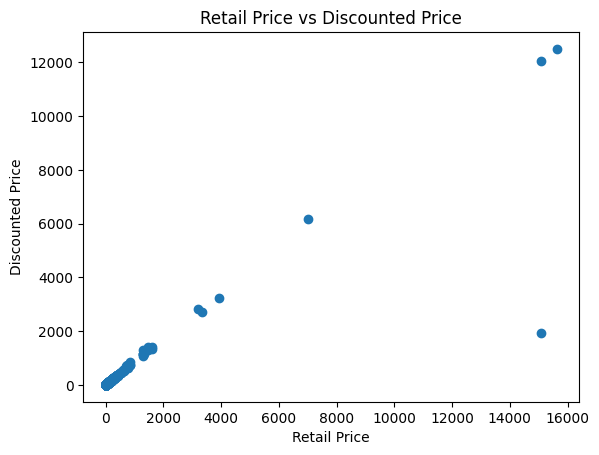

In [69]:
plt.scatter(df['retail_price'], df['discounted_price'])
plt.title('Retail Price vs Discounted Price')
plt.xlabel('Retail Price')
plt.ylabel('Discounted Price')
plt.show()

In [70]:
df[df['retail_price'].isna() & df['discounted_price'].isna()]

,id,name,source,prescription_required,retail_price,discounted_price,manufacturer,quantity,packaging_form,salts,base name,dosage form
60,source_7-90352,dolot tablet,source_7,True,NaN,NaN,micro,None,strip,tramadol 37.5 mg/paracetamol 325.0 mg,dolo,tablet
77,source_7-90357,doloage 20 mg injection,source_7,True,NaN,NaN,allenge,None,vial,piroxicam 20.0 mg,doloage,injection
87,source_7-90361,dolobak tablet,source_7,True,NaN,NaN,micro,None,strip,tramadol 37.5 mg/paracetamol 325.0 mg,dolobak,tablet
122,source_7-90376,doloby plus 100 mg/500 mg tablet,source_7,True,NaN,NaN,boyeger,None,strip,aceclofenac 100.0 mg/paracetamol 500.0 mg,doloby,tablet
161,source_6-75789,dolocide k plus strip of 10 tablets,source_6,True,NaN,NaN,kee,10 tablets,strip,diclofenac potassium,dolocide,tablet
200,source_6-75801,dolodil injection 2 ml,source_6,True,NaN,NaN,madhav,2 ml,vial,piroxicam 20.0 mg,dolodil,injection
203,source_6-75802,dolodol injection,source_6,True,NaN,NaN,ethix,2 ml,vial,tramadol,dolodol,injection
220,source_7-90413,dolofen a tablet,source_7,True,NaN,NaN,oyster,None,strip,ibuprofen 400.0 mg/paracetamol 325.0 mg/magnesium trisilicate 100.0 mg,dolofen,tablet
227,source_7-90418,dolofirst 375 mg/325 mg tablet,source_7,True,NaN,NaN,entod,None,strip,tramadol 37.5 mg/paracetamol 325.0 mg,dolofirst,tablet
233,source_7-90420,doloflam plus 100 mg/500 mg tablet,source_7,True,NaN,NaN,vilco,None,strip,nimesulide 100.0 mg/paracetamol 500.0 mg,doloflam,tablet


## Using KNN to impute values in retail_price column and then since discounted_price is highly correlated to retail_price we are finding average ratio and multiplying that in retail_price to approximate the discounted_price

In [71]:
df[['retail_price', 'discounted_price']] = df[['retail_price', 'discounted_price']].round(2)
knn_imputer = KNNImputer(n_neighbors=3)
df['retail_price'] = knn_imputer.fit_transform(df[['retail_price']])
valid_rows = df.dropna(subset=['retail_price', 'discounted_price'])

# Calculate the average ratio of 'discounted_price' to 'retail_price'
average_ratio = (valid_rows['discounted_price'] / valid_rows['retail_price']).mean()

# Use the average ratio to fill missing 'discounted_price' values
df['discounted_price'] = np.where(df['discounted_price'].isna(),
                                  df['retail_price'] * average_ratio,
                                  df['discounted_price'])

df[['retail_price', 'discounted_price']] = df[['retail_price', 'discounted_price']].round(2)

In [72]:
df.columns

Index(['id', 'name', 'source', 'prescription_required', 'retail_price',
       'discounted_price', 'manufacturer', 'quantity', 'packaging_form',
       'salts', 'base name', 'dosage form'],
      dtype='object')

In [73]:
df['quantity'] = df['quantity'].fillna('Unknown')

In [74]:
df

,id,name,source,prescription_required,retail_price,discounted_price,manufacturer,quantity,packaging_form,salts,base name,dosage form
0,source_6-75716,dolo 1 gm tablet,source_6,False,45.58,40.11,micro,10 tablets,strip,paracetamol/acetaminophen 1.0 g,dolo,tablet
1,source_2-39579,dolo 1000 mg infusion,source_2,True,268.00,219.76,micro,Unknown,bottle,paracetamol/acetaminophen 1000.0 mg,dolo,infusion
2,source_7-90343,dolo 1000 mg tablet,source_7,False,45.58,35.10,micro,10 tablets,strip,paracetamol 1000.0 mg,dolo,tablet
3,source_1-65076,dolo 1000 mg tablet 10's,source_1,True,45.50,40.00,micro,10 tablets,strip,paracetamol 1000.0 mg,dolo,tablet
4,source_1-65077,dolo 120 mg suspension 60 ml,source_1,False,40.00,35.20,micro,60.0 ml,bottle,paracetamol 120.0 mg,dolo,suspension
5,source_6-75717,dolo 120 mg suspension 60 ml,source_6,False,40.32,34.27,micro,60.0 ml,bottle,paracetamol/acetaminophen 120.0 mg/5 ml,dolo,suspension
6,source_2-39580,dolo 120 suspension,source_2,True,34.94,28.65,micro,Unknown,bottle,paracetamol/acetaminophen 120.0 mg/5 ml,dolo,suspension
7,source_3-2151,dolo 156 mg syp 60 ml,source_3,False,51.00,43.35,micro,60.0 ml,bottle,paracetamol/acetaminophen 156.2 mg/5 ml,dolo,syrup
8,source_7-90345,dolo 15625 mg suspension,source_7,False,56.00,49.60,micro,60.0 ml,bottle,paracetamol 156.2 mg/5 ml,dolo,suspension
9,source_1-65079,dolo 15625 mg syrup 60 ml,source_1,False,56.00,49.30,micro,60.0 ml,bottle,paracetamol 156.2 mg,dolo,syrup


In [75]:
df.to_csv("data.csv", index=False)

In [76]:
from google.colab import files
files.download("data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select numerical columns for clustering
features = ['retail_price', 'discounted_price', 'quantity']
df_cluster = df[features].copy()

# Convert 'quantity' to numeric (if not already)
df_cluster['quantity'] = pd.to_numeric(df_cluster['quantity'], errors='coerce')

# Fill missing values (if any) with median
df_cluster.fillna(df_cluster.median(), inplace=True)

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Determine optimal clusters using Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Choose an appropriate k (based on the elbow point) and fit KMeans
k_optimal = 3  # Change this based on elbow point
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(df_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = df_cluster['Cluster']

# Show sample clustered data
print(df[['retail_price', 'discounted_price', 'quantity', 'Cluster']].head(10))
